In [17]:
# Specifying the directories of training and testing data (may vary from user to user)
train_dir = './TRAIN'
test_dir = './TEST'

In [18]:
# visualizing the data
import os
# walking through train/test data
for path, dirs, files in os.walk(train_dir):
    if len(dirs): # only printing the path(s) which contain directories 
        print(f"Path: {path}, Directories: {dirs}")
# here it is observed that dataset contains two classes namely 'O' and 'R'
# Here 'O' stands for organic waste whereas 'R' stands for recyclable waste

Path: ./TRAIN, Directories: ['O', 'R']


In [16]:
# Read about ImageDataGenerator from tensorflow website
'''
The most important task this class does is it provides labels to our images.
It can provide labels to both binary as well as multi classes.
With reference to this example 'O' will be labelled as 0 and 'R' as 1 (or vice-versa).
It also helps in normalization and data augmentation.
'''
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
import tensorflow as tf

In [45]:
import random
import matplotlib.pyplot as plt
def visualize_image(dir_name:str, waste_type:str): # either train or test
    _dir = dir_name + '/' + waste_type + '/'
    files = os.listdir(_dir)
    img = random.choice(files)
    img = os.path.join(_dir, img)
    img = tf.io.read_file(img) # read the file from the given path
    img = tf.io.decode_image(img) # convert the file into form of 
    plt.title(img.shape)
    plt.imshow(img)
    plt.axis("off")

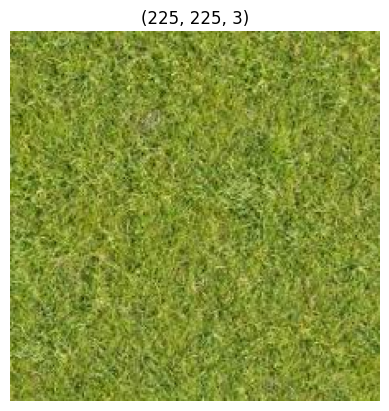

In [46]:
visualize_image('TRAIN', 'O')

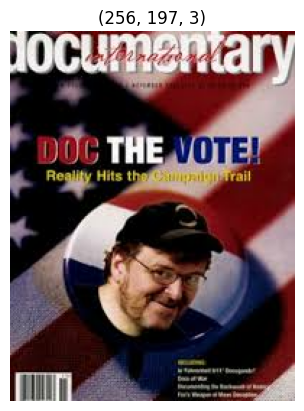

In [47]:
visualize_image('TRAIN', 'R')

In [41]:
# create an instance of class ImageDataGenerator
# here we'll apply normalization and augmentation to data
generator = ImageDataGenerator(rescale=1./255,
                              width_shift_range=0.2,
                              height_shift_range=0.3,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              shear_range=0.2)
'''
rescale - divides all the values in image tensor by 255 as a maximum pixel of an image is 255
rest all are augmentations which will be applied to images to create more diversity in dataset.
Not all of them will be applied to a single image. Only 1-2 will be applied to a single image.
'''

'\nrescale - divides all the values in image tensor by 255 as a maximum pixel of an image is 255\nrest all are augmentations which will be applied to images to create more diversity in dataset.\nNot all of them will be applied to a single image. Only 1-2 will be applied to single image\n'

In [55]:
# load train and test images
'''
flow_from_directory - load all files in a directory and in it's sub directories.
'''
train_data = generator.flow_from_directory(directory=train_dir,
                                          target_size=(224, 224), # to bring all images to same shape
                                          shuffle=True, # shuffle is True on intention
                                          seed=42,
                                          class_mode='binary', # used for two classes
                                          batch_size=32) # read on why we create batches?
test_data = generator.flow_from_directory(directory=test_dir,
                                          target_size=(224, 224), 
                                          shuffle=True, 
                                          seed=42,
                                          class_mode='binary', 
                                          batch_size=32) 

# It is important to note here that images in your directory won't be altered by these filters they will 
# remain as they are.

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [58]:
# visualizing the data
A = train_data.next() # gets a single batch of the whole loaded data
'''
A[0] - images (features)
A[1] - labels
'''
len(A[0]) # size of single batch

32

In [78]:
A[1]
# here we can see we have an array with values 0 and 1 which represent 'O' and 'R'

array([0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
      dtype=float32)

In [61]:
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.models import Sequential

In [66]:
# trying the model on CNN Explainer website (baseline model)
# read what each of this layer does and read about their parameters
model_1 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # provide input shape of a single image 
    # only in the first layer
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, 'sigmoid')
])

model_1.compile(loss=binary_crossentropy,
               metrics=['accuracy'],
               optimizer=Adam())

history_1 = model_1.fit(train_data,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data),
                       epochs=5)
# try adjusting model according to your preference and try to achieve an accuracy of 95 percent or more

Epoch 1/5
706/706 [==============================] - 811s 1s/step - loss: 0.4588 - accuracy: 0.7945 - val_loss: 0.3693 - val_accuracy: 0.8583
Epoch 2/5
706/706 [==============================] - 13245s 19s/step - loss: 0.4028 - accuracy: 0.8282 - val_loss: 0.3457 - val_accuracy: 0.8723
Epoch 3/5
706/706 [==============================] - 655s 927ms/step - loss: 0.3823 - accuracy: 0.8440 - val_loss: 0.3341 - val_accuracy: 0.8802
Epoch 4/5
706/706 [==============================] - 624s 883ms/step - loss: 0.3724 - accuracy: 0.8467 - val_loss: 0.3082 - val_accuracy: 0.8882
Epoch 5/5
706/706 [==============================] - 629s 890ms/step - loss: 0.3633 - accuracy: 0.8520 - val_loss: 0.2839 - val_accuracy: 0.9005


In [67]:
'''
After running the model we got a training accuracy of around 85% and validation accuracy of 90%.
This is a good thing as model is correct 90% of the times on unseen data.
'''

'\nAfter running the model we got a training accuracy of around 85% and validation accuracy of 90%.\nThis is a good thing as model is correct 90% of the times on unseen data.\n'

In [72]:
hist_1 = history_1.history
epochs = range(len(hist_1['loss'])) # number of epochs of the model "model_1"
def plot_loss_curves(history):
    val_loss = history['val_loss']
    train_loss = history['loss']
    plt.plot(epochs, val_loss, label='validation_loss')
    plt.plot(epochs, train_loss, label='training_loss')
    plt.legend()
    plt.show()
    
def plot_accuracy_curves(history):
    val_accuracy = history['val_accuracy']
    train_accuracy = history['accuracy']
    plt.plot(epochs, val_accuracy, label='validation_accuracy')
    plt.plot(epochs, train_accuracy, label='training_accuracy')
    plt.legend()
    plt.show()

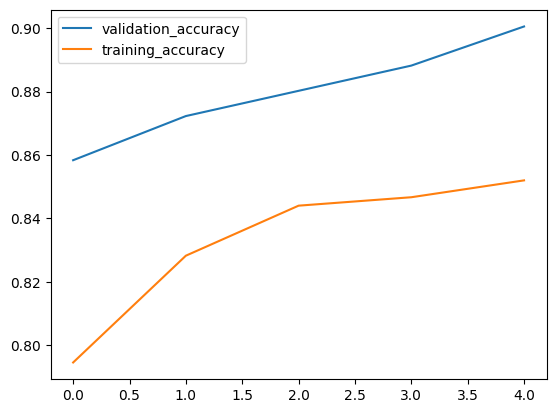

In [70]:
plot_accuracy_curves(hist_1)

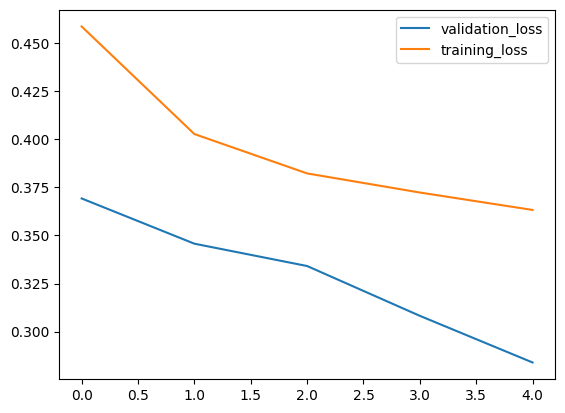

In [73]:
plot_loss_curves(hist_1)

In [74]:
# here it is seen that validation loss considerably goes down which is a good indication
# for a machine learning model

In [81]:
test_img = './test-img-1.jpg'
# we need to bring images to considerable shape and size so we need to preprocess them before they
# can be fed into our model.

def read_and_preprocess(image):
    img = tf.io.read_file(test_img)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img, [224, 224])
    img = tf.expand_dims(img, axis=0) # image contains 3 dims by default but we need 4th dim as well which
    # is batch size so we expand dimension by 1
    return img
        

In [119]:
import numpy as np
def visualize_result(img, original_label):
    pred_label = model_1.predict(img)
    pred_label = np.ravel(np.around(pred_label))
    pred_label = pred_label[0]
    pred_label = 'Organic' if pred_label == 0 else 'Recycle'
    plt.figure(figsize=(5, 5))
    plt.title(f"Orginal:{original_label}, Predicted:{pred_label}",
             color='green' if original_label==pred_label else 'red')
    plt.imshow(tf.squeeze(img/255))
#     plt.show()

In [120]:
image = read_and_preprocess(test_img)

1/1 [==============================] - 0s 48ms/step


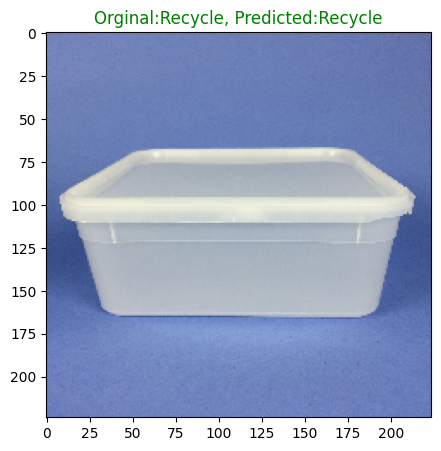

In [121]:
visualize_result(image, 'Recycle')

In [123]:
test_img = './food-waste.jpg'
image = read_and_preprocess(test_img)

1/1 [==============================] - 0s 32ms/step


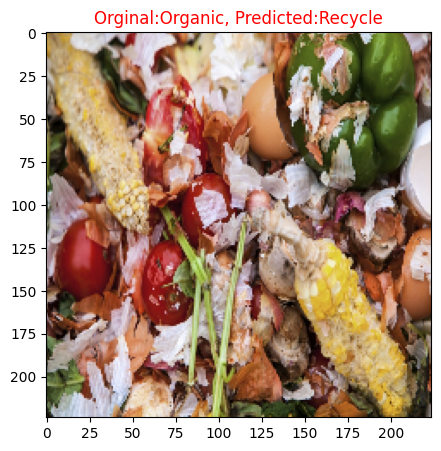

In [128]:
visualize_result(image, 'Organic')

1/1 [==============================] - 0s 40ms/step


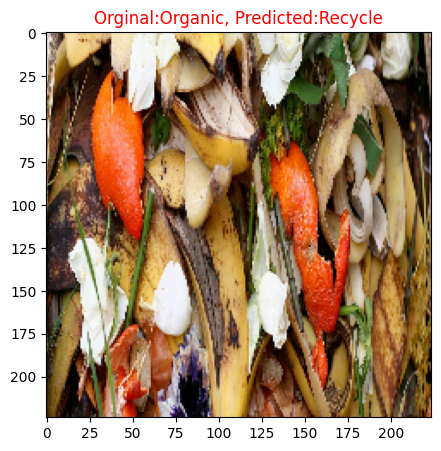

In [134]:
test_img = './organic_waste.jpg'
image = read_and_preprocess(test_img)
visualize_result(image, 'Organic')

1/1 [==============================] - 0s 36ms/step


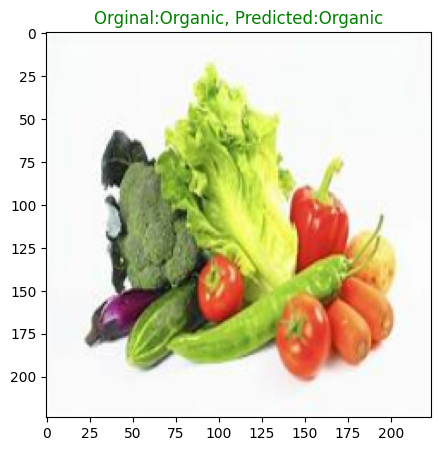

In [135]:
test_img = './veggies.jpeg'
image = read_and_preprocess(test_img)
visualize_result(image, 'Organic')

In [ ]:
# Contributor - Vipul Sharma (owner)